## Geometric and intensity transformations

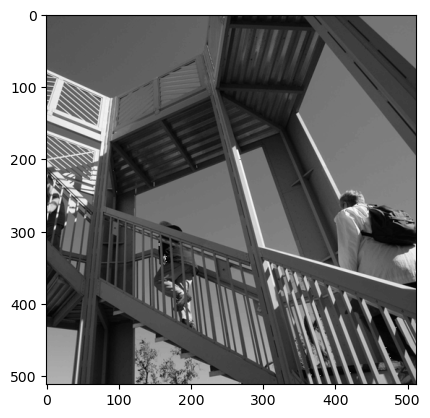

In [1]:
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#install skimage: pip install scikit-image
import skimage
from skimage import transform

from scipy import ndimage
f = misc.ascent()  # retrieve a grayscale image
imshow(f, cmap=plt.cm.gray)

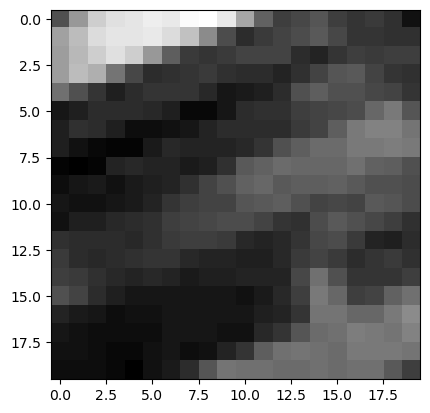

In [2]:
# Explore intensity variations
imshow(f[220:240, 110:130], cmap=plt.cm.gray, interpolation='nearest') 

In [3]:
## Geometric transformations
lx, ly = f.shape
# Cropping
crop_f = f[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_f = np.flipud(f)
# rotation
rotate_f = ndimage.rotate(f, 45)
rotate_f_noreshape = ndimage.rotate(f, 45, reshape=False)

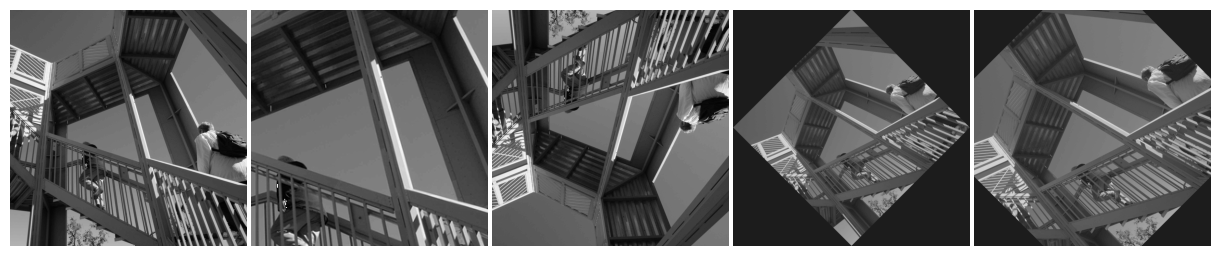

In [4]:

plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
imshow(crop_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
imshow(flip_ud_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
imshow(rotate_f_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Translation

Text(0.5, 1.0, 'Translated image')

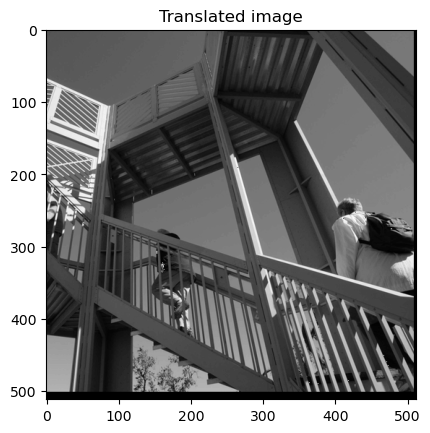

In [5]:
# Recall the shape of the transformation matrix
#[[a0  a1  a2]
# [b0  b1  b2]
# [0   0    1]]
# Lets translate by dx=3 and dy=10 pixels
transl=np.array([[1,0,3],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

### Shear

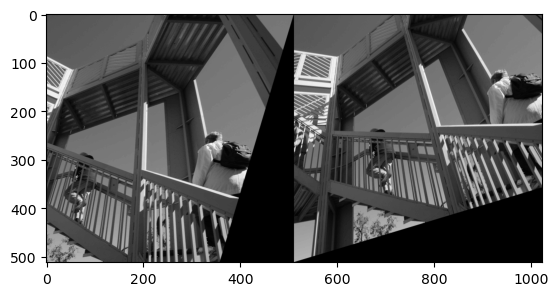

In [6]:
# horizontal
f=f/255.0 # scale to the pixel intensity range (0,1) 
shear1=np.array([[1, 0.3 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
# vertical
shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

In [7]:
tf_v

<AffineTransform(matrix=
    [[1. , 0. , 0. ],
     [0.3, 1. , 0. ],
     [0. , 0. , 1. ]]) at 0x255daf6f580>

### Rescaling

In [8]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

Text(0.5, 1.0, 'Rescaled image by 50%')

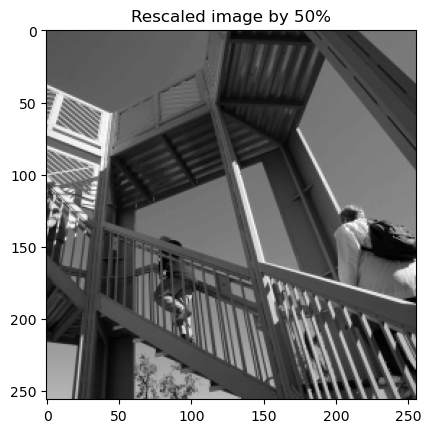

In [9]:
imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

### Resizing 

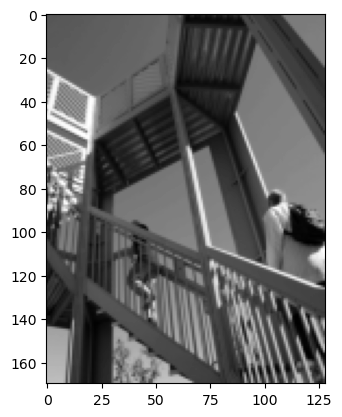

In [10]:
f_resized=transform.resize(f, (int(f.shape[0]/3), f.shape[1]/4), anti_aliasing=True)
imshow(f_resized, cmap='gray')

In [11]:
np.shape(f_resized)

(170, 128)

### Rotation with transform.rotate 

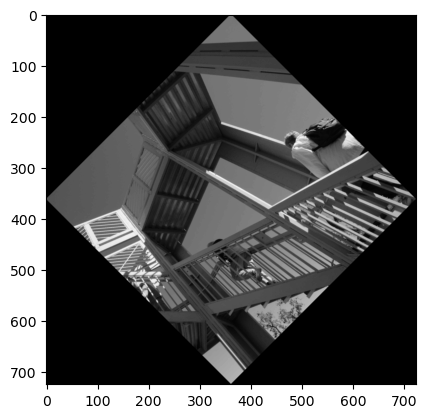

In [12]:
import math

tf=transform.rotate(f, 45, resize=True, mode='constant')
im=tf*255
imshow(im, cmap='gray')


### Question 1:
#### 1.  Using Python skimage.transform functions considered above, perform a horizontal shear by 0.2 and image rescaling by 50% on 'ascent' image (referred to as f).Display the final result.
#### 2. Define a translation matrix for shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image (f=ascent). Display the final result.
#### 3. Start with ascent image (f). Perform a consequent series of operations on an image f, rotate  an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.  


Text(0.5, 1.0, 'Horizontal shear by 0.2 and Rescaled image by 50%')

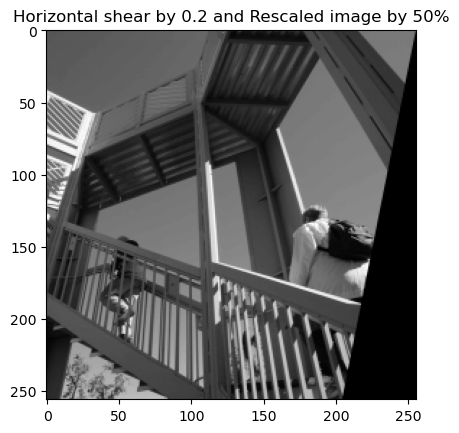

In [18]:
##Horizontal shear by 0.2 and Rescaled image by 50%

shear1=np.array([[1, 0.2 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
f_rescaled=transform.rescale(im1, 0.5, anti_aliasing=False)
imshow(f_rescaled, cmap='gray')
plt.title("Horizontal shear by 0.2 and Rescaled image by 50%")

Text(0.5, 1.0, 'Translated image : 5 pixels in x-direction and by 10 pixels in y-direction')

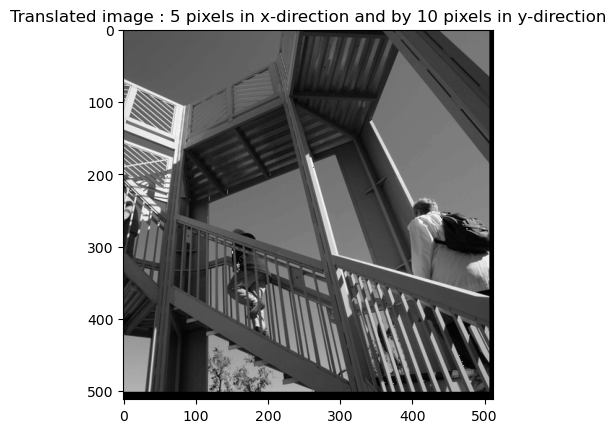

In [23]:
transl=np.array([[1,0,5],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image : 5 pixels in x-direction and by 10 pixels in y-direction")

Text(0.5, 1.0, 'Rotate by -45 degree , rescaled by 1.2 , cropped 50% from center ')

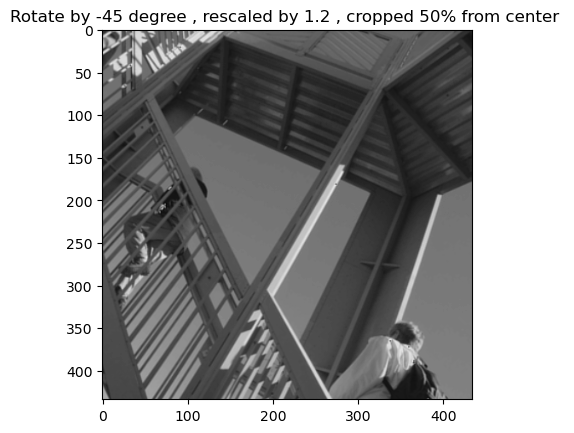

In [42]:
# Leave your answer here
rotate_f = ndimage.rotate(f, -45)
f_rescaled=transform.rescale(rotate_f, 1.2, anti_aliasing=False)
## Geometric transformations
imshow(f_rescaled, cmap='gray')
# Calculate the new dimensions for cropping (50% of the original dimensions)
new_height = int(f_rescaled.shape[0] * 0.5)
new_width = int(f_rescaled.shape[1] * 0.5)

# Calculate the starting indices for cropping to the central part
start_height = (f_rescaled.shape[0] - new_height) // 2
start_width = (f_rescaled.shape[1] - new_width) // 2


# Crop the rescaled image to the central 50%
cropped_f = f_rescaled[start_height:start_height+new_height, start_width:start_width+new_width]


imshow(cropped_f, cmap='gray')
plt.title("Rotate by -45 degree , rescaled by 1.2 , cropped 50% from center ")

### Gamma correction and log contrast adjustment

C:\Users\jaivi\AppData\Local\Temp\ipykernel_9680\781592483.py:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes=np.zeros((2,3), dtype=np.object)


Text(0.5, 0, 'Pixel intensity')

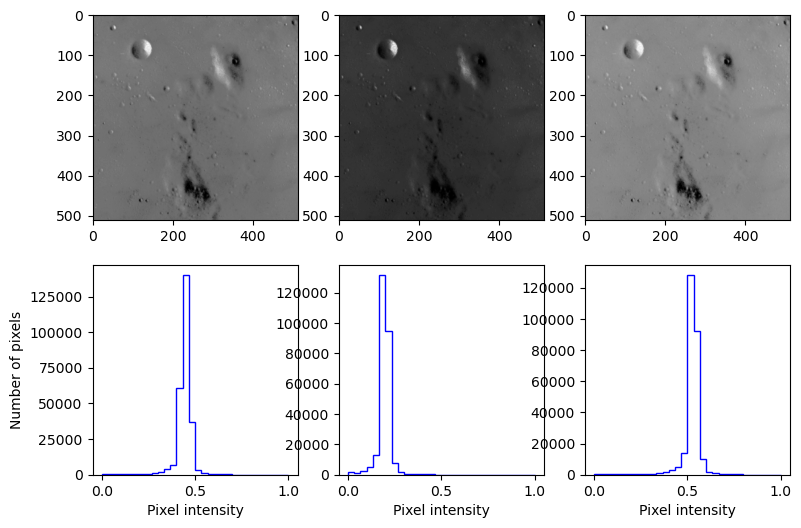

In [13]:
from skimage import data, img_as_float
from skimage import exposure

# Load a low-contrast image
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))
axes=np.zeros((2,3), dtype=np.object)
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

# Gamma corrected
gamma_corrected = exposure.adjust_gamma(im, 2)

# logarithmic corrected
logarithmic_corrected = exposure.adjust_log(im, 1)

#__________________________
# Display image
ax_im[0].imshow(im, cmap='gray')
#Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(logarithmic_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')


### Question 2: 
1. Describe the effect of Gamma-correction on the distribution of pixel intensities.
2. How does logarithmic transformation improve the quality of an image?
3. Perform Gamma-transformation of the moon image with the value of  $\gamma$ < 1. What effect do you observe on pixel intensities of the original image? How is you result compared against Gamma-corrected pixel intensities obtained with $\gamma$=2?


Text(0.5, 0, 'Pixel intensity r=2')

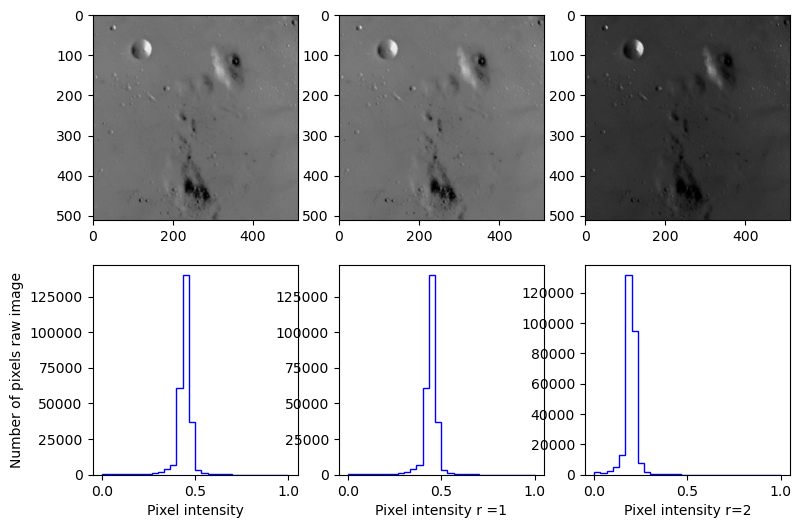

In [53]:
# Load a low-contrast image
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))
axes=np.zeros((2,6), dtype=np.object_)
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

# Gamma corrected
gamma_corrected_1 = exposure.adjust_gamma(im, 1)

# Gamma corrected_2
gamma_corrected_2 = exposure.adjust_gamma(im, 2)

#__________________________
# Display image
ax_im[0].imshow(im, cmap='gray')
#Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels raw image')

ax_im[1].imshow(gamma_corrected_1, cmap='gray')
#Display histogram for gamma-corrected image R=1
ax_hist[1].hist(gamma_corrected_1.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity r =1')

ax_im[2].imshow(gamma_corrected_2, cmap='gray')
#Display histogram for gamma-corrected image R=2
ax_hist[2].hist(gamma_corrected_2.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity r=2')


<ol><li>Gamma = 1 means no correction on the pixel intesitiy

 If its less than 1 then it will brighten the image It redistributes pixel values so that higher intensities are emphasized, making the image appear brighter overall. This can be useful for enhancing details in the highlights. 
 
 If its more than 1 then it will make ther image darker  It redistributes pixel values in such a way that lower intensities are boosted, making the image appear darker overall. This is often used to enhance details in the shadows of an image.</li>
 
 <li>Logarithmic transformation is a common image enhancement technique that improves the quality of an image by adjusting the distribution of pixel intensities. Here's how it improves image quality:
 
 Dynamic Range Compression , Enanching high quality image , Noise Reduction , Improved Visualization</li>


 <li>When gamma is 1 we dont find any difference in the quality of the image and pixel intensity but when Gamma is increased to 2 , we could see the image got darker and pixel intensity reduced from 0.5 to 0.2 approx</li>
 
 
 
 </ol>
